## Data Cleaning in Python

#### Data cleaning, or cleansing, is the process of correcting and deleting inaccurate records from a database or table. It mainly consists of identifying and replacing incomplete, inaccurate, irrelevant, or otherwise problematic (‘dirty’) data and records.

 


### Issues in Datasets:

- Missing Values
- Irrelevant data
- Duplicated records
- Outliers
- Noise Values
- …

#### The error in the data is primarily due to source of the data.

#### Handling Missing Data

Missing data can arise in the dataset due to multiple reasons: the data for the specific field was not added by the user/data collection application, data was lost while transferring manually, a programming error, etc. It is sometimes essential to understand the cause because this will influence how you deal with such data.

In [1]:
import pandas as pd
import numpy as np

In [2]:
# Creating a pandas series
data = pd.Series([0, 1, 2, 3, 4, 5, np.nan, 6, 7, 8])

# To check if and what index in the dataset contains null value
data.isnull()

0    False
1    False
2    False
3    False
4    False
5    False
6     True
7    False
8    False
9    False
dtype: bool

We can use the dropna() function to filter out missing data and to remove the null (missing) value and see only the non-null values. However, the NaN value is not really deleted and can still be found in the original dataset.

In [3]:
# Will not show the index 6 cause it contains null (NaN) value
data.dropna()

0    0.0
1    1.0
2    2.0
3    3.0
4    4.0
5    5.0
7    6.0
8    7.0
9    8.0
dtype: float64

In [4]:
# Creating a dataframe with 4 rows and 4 columns (4*4 matrix)
data_dim = pd.DataFrame([[1,2,3,np.nan],[4,5,np.nan,np.nan],[7,np.nan,np.nan,np.nan]])
data_dim

,0,1,2,3
0,1,2.0,3.0,NaN
1,4,5.0,NaN,NaN
2,7,NaN,NaN,NaN


In [5]:
# Drop all columns that have atleast 1 NaN value
data_dim.dropna(how = 'any',axis=1)

,0
0,1
1,4
2,7


In [6]:
# Drop all columns that have all NaN values
data_dim.dropna(how = 'all',axis=1)

,0,1,2
0,1,2.0,3.0
1,4,5.0,NaN
2,7,NaN,NaN


In [7]:
# Fill the NaN values with 0
data_dim_fill = data_dim.fillna(0)
data_dim_fill

,0,1,2,3
0,1,2.0,3.0,0.0
1,4,5.0,0.0,0.0
2,7,0.0,0.0,0.0


With some understanding of the data and your use-case, you can use the fillna() function in many other ways than simply filling it with numbers. You could fill it up using the mean using the mean() or the median value median() as well.

In [8]:
# Fill the NaN value with mean values in the corresponding column
data_dim_fill = data_dim.fillna(data_dim.mean())
data_dim_fill

,0,1,2,3
0,1,2.0,3.0,NaN
1,4,5.0,3.0,NaN
2,7,3.5,3.0,NaN


<b>DataFrame Concatenation</b> - To do this, we can use the concat() function in pandas. To continue the indexing after applying the concatenation, you can pass the ignore_index = True argument to it.

In [9]:
new_data = pd.DataFrame([[99,98,97,96],[10,11,12,13],[9,9,9,9]])
combined_series = pd.concat([data_dim_fill, new_data], ignore_index = True)
combined_series
# When axis=0, it merges horizontally, when 1, vertically

,0,1,2,3
0,1,2.0,3.0,NaN
1,4,5.0,3.0,NaN
2,7,3.5,3.0,NaN
3,99,98.0,97.0,96.0
4,10,11.0,12.0,13.0
5,9,9.0,9.0,9.0


## Dealing with Categorical Variables

Categorical features can only take on a limited, and usually fixed, number of possible values. For example, if a dataset is about information related to users, then you will typically find features like country, gender etc. Alternatively, if the data you're working with is related to products, you will find features like product type, manufacturer, seller and so on.

Note that the type of features where the categories are only labeled without any order of precedence are called <b>nominal features</b>.
Features which have some order associated with them are called <b>ordinal features</b>. For example, a feature like economic status, with three categories: low, medium and high, which have an order associated with them.

In [10]:
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
from sklearn.impute import SimpleImputer

In [11]:
# Sample Data
data = pd.DataFrame(
       [['female', 'New York', 'low', 84], ['female', 'London', 'medium', 37], ['male', 'New Delhi', 'high', 92]],
       columns=['Gender', 'City', 'Temperature', 'Score'])

In [12]:
data

,Gender,City,Temperature,Score
0,female,New York,low,84
1,female,London,medium,37
2,male,New Delhi,high,92


Since, there is a meaning behind the order of levels( low < medium < high ), column Temperature is Oridal.

In [13]:
# Load Flights Dataset
df_flights = pd.read_csv(r'D:\training\pyspark\Caegorical Data handling\flights.csv')

df_flights.head()

,year,month,day,dep_time,dep_delay,arr_time,arr_delay,carrier,tailnum,flight,origin,dest,air_time,distance,hour,minute
0,2014,1,1,1.0,96.0,235.0,70.0,AS,N508AS,145,PDX,ANC,194.0,1542,0.0,1.0
1,2014,1,1,4.0,-6.0,738.0,-23.0,US,N195UW,1830,SEA,CLT,252.0,2279,0.0,4.0
2,2014,1,1,8.0,13.0,548.0,-4.0,UA,N37422,1609,PDX,IAH,201.0,1825,0.0,8.0
3,2014,1,1,28.0,-2.0,800.0,-23.0,US,N547UW,466,PDX,CLT,251.0,2282,0.0,28.0
4,2014,1,1,34.0,44.0,325.0,43.0,AS,N762AS,121,SEA,ANC,201.0,1448,0.0,34.0


In [14]:
print(df_flights.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 162049 entries, 0 to 162048
Data columns (total 16 columns):
year         162049 non-null int64
month        162049 non-null int64
day          162049 non-null int64
dep_time     161192 non-null float64
dep_delay    161192 non-null float64
arr_time     161061 non-null float64
arr_delay    160748 non-null float64
carrier      162049 non-null object
tailnum      161801 non-null object
flight       162049 non-null int64
origin       162049 non-null object
dest         162049 non-null object
air_time     160748 non-null float64
distance     162049 non-null int64
hour         161192 non-null float64
minute       161192 non-null float64
dtypes: float64(7), int64(5), object(4)
memory usage: 19.8+ MB
None


In [15]:
df_flights.head()

,year,month,day,dep_time,dep_delay,arr_time,arr_delay,carrier,tailnum,flight,origin,dest,air_time,distance,hour,minute
0,2014,1,1,1.0,96.0,235.0,70.0,AS,N508AS,145,PDX,ANC,194.0,1542,0.0,1.0
1,2014,1,1,4.0,-6.0,738.0,-23.0,US,N195UW,1830,SEA,CLT,252.0,2279,0.0,4.0
2,2014,1,1,8.0,13.0,548.0,-4.0,UA,N37422,1609,PDX,IAH,201.0,1825,0.0,8.0
3,2014,1,1,28.0,-2.0,800.0,-23.0,US,N547UW,466,PDX,CLT,251.0,2282,0.0,28.0
4,2014,1,1,34.0,44.0,325.0,43.0,AS,N762AS,121,SEA,ANC,201.0,1448,0.0,34.0


In [16]:
df_flights.isna().sum()

year            0
month           0
day             0
dep_time      857
dep_delay     857
arr_time      988
arr_delay    1301
carrier         0
tailnum       248
flight          0
origin          0
dest            0
air_time     1301
distance        0
hour          857
minute        857
dtype: int64

In [17]:
cat_df_flights = df_flights.select_dtypes(include=['object']).copy()

In [18]:
cat_df_flights.head()

,carrier,tailnum,origin,dest
0,AS,N508AS,PDX,ANC
1,US,N195UW,SEA,CLT
2,UA,N37422,PDX,IAH
3,US,N547UW,PDX,CLT
4,AS,N762AS,SEA,ANC


Another Exploratory Data Analysis (EDA) step that you might want to do on categorical features is the frequency distribution of categories within the feature, which can be done with the .value_counts() method as described earlier.

In [19]:
print(cat_df_flights['carrier'].value_counts())

AS    62460
WN    23355
OO    18710
DL    16716
UA    16671
AA     7586
US     5946
B6     3540
VX     3272
F9     2698
HA     1095
Name: carrier, dtype: int64


In [20]:
print(cat_df_flights.isnull().sum())

carrier      0
tailnum    248
origin       0
dest         0
dtype: int64


It seems that only the tailnum column has null values. You can do a mode imputation for those null values. The function fillna() is handy for such operations.

In [21]:
cat_df_flights = cat_df_flights.fillna(cat_df_flights['tailnum'].value_counts().index[0])

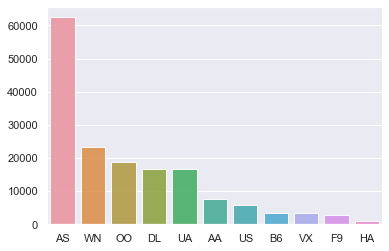

In [22]:
carrier_count = df_flights['carrier'].value_counts()
sns.set(style="darkgrid")
sns.barplot(carrier_count.index, carrier_count.values, alpha=0.9)

In [23]:
from sklearn.linear_model import LinearRegression

In [24]:
df_flights.iloc[:,0:8]

,year,month,day,dep_time,dep_delay,arr_time,arr_delay,carrier
0,2014,1,1,1.0,96.0,235.0,70.0,AS
1,2014,1,1,4.0,-6.0,738.0,-23.0,US
2,2014,1,1,8.0,13.0,548.0,-4.0,UA
3,2014,1,1,28.0,-2.0,800.0,-23.0,US
4,2014,1,1,34.0,44.0,325.0,43.0,AS
...,...,...,...,...,...,...,...,...
162044,2014,9,30,2357.0,-2.0,545.0,-20.0,UA
162045,2014,9,30,2359.0,4.0,734.0,-1.0,DL
162046,2014,9,30,NaN,NaN,NaN,NaN,AS
162047,2014,9,30,NaN,NaN,NaN,NaN,US


In [25]:
X_train = df_flights.iloc[:,0:7]
y_train = df_flights['distance']

In [26]:
X_train.day.mode()

0    21
dtype: int64

In [27]:
X_train.fillna(X_train.mean(),inplace=True)


In [28]:
X_train.isna().sum()

year         0
month        0
day          0
dep_time     0
dep_delay    0
arr_time     0
arr_delay    0
dtype: int64

In [29]:
X_train

,year,month,day,dep_time,dep_delay,arr_time,arr_delay
0,2014,1,1,1.000000,96.000000,235.000000,70.000000
1,2014,1,1,4.000000,-6.000000,738.000000,-23.000000
2,2014,1,1,8.000000,13.000000,548.000000,-4.000000
3,2014,1,1,28.000000,-2.000000,800.000000,-23.000000
4,2014,1,1,34.000000,44.000000,325.000000,43.000000
...,...,...,...,...,...,...,...
162044,2014,9,30,2357.000000,-2.000000,545.000000,-20.000000
162045,2014,9,30,2359.000000,4.000000,734.000000,-1.000000
162046,2014,9,30,1278.283755,6.133859,1482.501282,2.240868
162047,2014,9,30,1278.283755,6.133859,1482.501282,2.240868


In [30]:
regressor = LinearRegression()  
regressor.fit(X_train, y_train)

LinearRegression()

### Many machine learning models, such as regression or SVM, are algebraic. This means that their input must be numerical. To use these models, categories must be transformed into numbers first, before you can apply the learning algorithm on them.

### Ways of Encoding
#### 1. Replace Values
#### 2. Encoding labels
#### 3. One Hot Encoding


<b>Replacing values</b> - This can be achieved with the help of the replace() function in pandas. The idea is that we have the liberty to choose whatever numbers we want to assign to the categories according to the business use case.

In [21]:
cat_df_flights.carrier.nunique()

11

In [22]:
replace_map = {'carrier': {'AA': 1, 'AS': 2, 'B6': 3, 'DL': 4,
                                  'F9': 5, 'HA': 6, 'OO': 7 , 'UA': 8 , 'US': 9,'VX': 10,'WN': 11}}

In [23]:
cat_df_flights_replace = cat_df_flights.copy()

In [24]:
cat_df_flights_replace.replace(replace_map, inplace=True)

print(cat_df_flights_replace.head())

   carrier tailnum origin dest
0        2  N508AS    PDX  ANC
1        9  N195UW    SEA  CLT
2        8  N37422    PDX  IAH
3        9  N547UW    PDX  CLT
4        2  N762AS    SEA  ANC


As we can observe, we have encoded the categories with the mapped numbers in our DataFrame.

we can also check the dtype of the newly encoded column, which is now converted to integers.

In [25]:
print(cat_df_flights_replace['carrier'].dtypes)

int64


<b>Label Encoding</b> -Another approach is to encode categorical values with a technique called "label encoding", which allows you to convert each value in a column to a number. Numerical labels are always between 0 and n_categories-1.


In [26]:
from sklearn.preprocessing import LabelEncoder

lb_make = LabelEncoder()
cat_df_flights['carrier_code_le'] = lb_make.fit_transform(cat_df_flights['carrier'])

cat_df_flights.head()

,carrier,tailnum,origin,dest,carrier_code_le
0,AS,N508AS,PDX,ANC,1
1,US,N195UW,SEA,CLT,8
2,UA,N37422,PDX,IAH,7
3,US,N547UW,PDX,CLT,8
4,AS,N762AS,SEA,ANC,1


Label encoding is pretty much intuitive and straight-forward and may give you a good performance from your learning algorithm, but it has as disadvantage that the numerical values can be misinterpreted by the algorithm.

<b>One Hot Encoding</b> - The basic strategy is to convert each category value into a new column and assign a 1 or 0 (True/False) value to the column. This has the benefit of not weighting a value improperly.

There are many libraries out there that support one-hot encoding but the simplest one is using pandas' .get_dummies() method.

In [27]:
cat_df_flights_onehot = cat_df_flights.copy()
cat_df_flights_onehot = pd.get_dummies(cat_df_flights_onehot, columns=['carrier'], prefix = ['carrier'])

print(cat_df_flights_onehot.head())

  tailnum origin dest  carrier_code_le  carrier_AA  carrier_AS  carrier_B6  \
0  N508AS    PDX  ANC                1           0           1           0   
1  N195UW    SEA  CLT                8           0           0           0   
2  N37422    PDX  IAH                7           0           0           0   
3  N547UW    PDX  CLT                8           0           0           0   
4  N762AS    SEA  ANC                1           0           1           0   

   carrier_DL  carrier_F9  carrier_HA  carrier_OO  carrier_UA  carrier_US  \
0           0           0           0           0           0           0   
1           0           0           0           0           0           1   
2           0           0           0           0           1           0   
3           0           0           0           0           0           1   
4           0           0           0           0           0           0   

   carrier_VX  carrier_WN  
0           0           0  
1           

As you can see, the column carrier_AS gets value 1 at the 0th and 4th observation points as those points had the AS category labeled in the original DataFrame. Likewise for other columns also.

In [28]:
result_df = pd.concat([cat_df_flights,cat_df_flights_onehot ], axis=1)

print(result_df.head())

  carrier tailnum origin dest  carrier_code_le tailnum origin dest  \
0      AS  N508AS    PDX  ANC                1  N508AS    PDX  ANC   
1      US  N195UW    SEA  CLT                8  N195UW    SEA  CLT   
2      UA  N37422    PDX  IAH                7  N37422    PDX  IAH   
3      US  N547UW    PDX  CLT                8  N547UW    PDX  CLT   
4      AS  N762AS    SEA  ANC                1  N762AS    SEA  ANC   

   carrier_code_le  carrier_AA  carrier_AS  carrier_B6  carrier_DL  \
0                1           0           1           0           0   
1                8           0           0           0           0   
2                7           0           0           0           0   
3                8           0           0           0           0   
4                1           0           1           0           0   

   carrier_F9  carrier_HA  carrier_OO  carrier_UA  carrier_US  carrier_VX  \
0           0           0           0           0           0           0   
1   

Note that this lb_results_df resulted in a new DataFrame with only the one hot encodings for the feature carrier. This needs to be concatenated back with the original DataFrame, which can be done via pandas' .concat() method. The axis argument is set to 1 as you want to merge on columns